# [ 모델 성능 평가지표 ]
- 실제값과 예측값을 비교해서 모델의 성능을 측정하는 것
  
- 머신러닝은 데이터 가공/변환, 모델 학습/예측, 평가(Evaluation)의 과정으로 구성된다. 여러가지 방법으로 예측 성능을 평가할 수 있는데, 성능 평가 지표는 분류모델 vs. 회귀모델에 따라 여러 종류로 나뉜다.
    - 회귀 : 실제값과 예측값의 오차 평균에 기반
<br><br/>
- 이진분류에서는 정확도보다 다른 성능 평가 지표가 더 중요시 되는 경우가 많음

- 모델 평가 목적? : Overfitting을 방지하고 최적의 모델을 찾기 위해

## 분류문제 성능 측정
- 실제값과 예측값이 일치하는 갯수를 통해 측정

![](https://codetorial.net/tensorflow/_images/MNIST_sample.png)

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits.data.shape # 8 x 8 크기의 이미지가 Flatten 되어있음

(1797, 64)

In [5]:
set(digits.target) # 타겟 중복값 제거한 후 값 확인

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
digits.target.shape

(1797,)

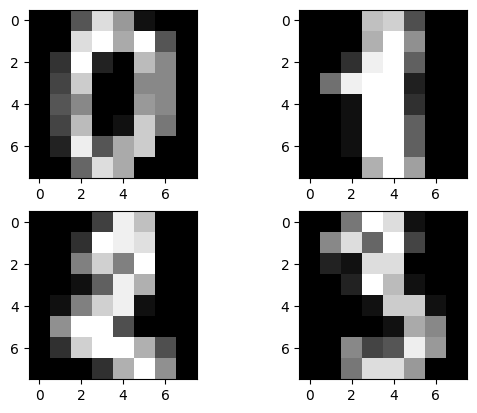

In [8]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(digits.data[0].reshape(8,8),cmap="gray")
ax[0,1].imshow(digits.data[1].reshape(8,8),cmap="gray")
ax[1,0].imshow(digits.data[2].reshape(8,8),cmap="gray")
ax[1,1].imshow(digits.data[3].reshape(8,8),cmap="gray")
plt.show()

In [9]:
# 5를 맞추는 문제로 재정의

data = digits.data
target = (digits.target == 3).astype(int)
target.mean()

0.1018363939899833

In [10]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((1347, 64), (450, 64), (1347,), (450,))

In [11]:
y_train.mean(), y_test.mean() # 둘다 10

(0.10022271714922049, 0.10666666666666667)

---

## Confusion Matrix (혼동행렬, 오차행렬)
- 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나

<img src = "https://plat.ai/wp-content/uploads/Table1-2.png.webp" width="580" height="450"/>

### Precision (정밀도)
- 모델이 True라고 분류한 것 중, 실제로 True인 것의 비율

### Recall (재현율)
- 실제 True인 것 중, 모델이 True라고 예측한 것의 비율
- 암기 tip?) 모델이 True라고 잘 '재현'한 것 -> 재현율 

### Precision(정밀도) - Recall(재현율) 곡선
- 정밀도/재현율 트레이드 오프 (반비례 관계)

### F1-score

### Accuracy (정확도)

$$\text{accuracy} = \frac{\text{정확히 예측한 수}}{\text{전체 샘플 수}} = \frac{TP + TN}{TP+FN+FP+TN}$$

### ROC Curve (Receiver Operating Characteristic Curve)
- FPR을 X축으로, TPR을 Y축으로 한 그래프
    - FPR = FP / (FP+TN)
    - TPR = TP / (FN+TP)

### AUROC (ROC AUC)